# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combined dataset
combined_df = pd.merge(study_results, mouse_metadata, on='Mouse ID') 
# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Number of mice
combined_df['Mouse ID'].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df.loc[combined_df["Mouse ID"]=="g989",:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df[combined_df['Mouse ID'] != 'g989']
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_reg_group = cleaned_df.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_mean = drug_reg_group.mean()['Tumor Volume (mm3)']
drug_median = drug_reg_group.median()['Tumor Volume (mm3)']
drug_variance = drug_reg_group.var()['Tumor Volume (mm3)']
drug_std_dev = drug_reg_group.std()['Tumor Volume (mm3)']
drug_sem = drug_reg_group.sem()['Tumor Volume (mm3)']
 
# Assemble the resulting series into a single summary DataFrame.
drug_summary_df = pd.DataFrame({"Mean Tumor Volume":drug_mean,"Median Tumor Volume":drug_median, "Tumor Volume Variance":
                            drug_variance,"Tumor Volume Std. Dev.":drug_std_dev, "Tumor Volume Std. Err":drug_sem})

drug_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

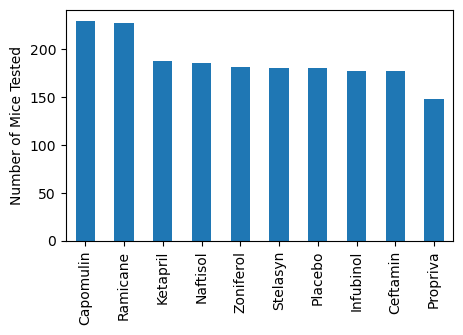

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandas_bar = cleaned_df["Drug Regimen"].value_counts()
pandas_chart = pandas_bar.plot(kind='bar', figsize=(5,3));
pandas_chart.set_ylabel("Number of Mice Tested")


Text(0, 0.5, 'Nubmer of Mice Tested')

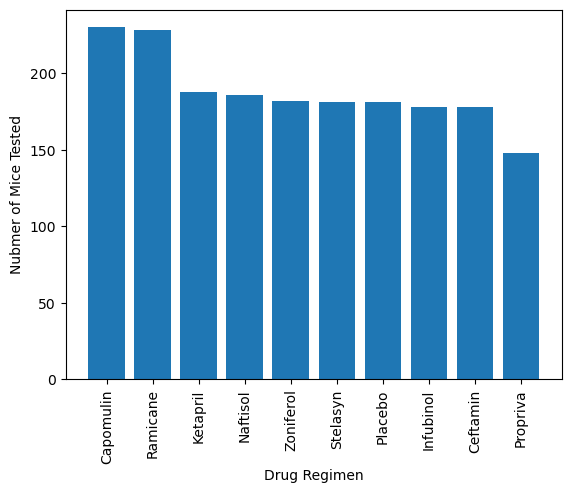

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_axis = pandas_bar.values.tolist()
x_axis = pandas_bar.index.tolist()
plt.bar(x_axis, y_axis, align="center")
plt.xticks(rotation = 'vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Nubmer of Mice Tested")

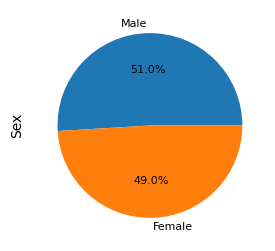

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_panda = cleaned_df['Sex'].value_counts()
gender_panda.plot(kind='pie', autopct="%.1f%%", figsize=(3,3), fontsize=8);

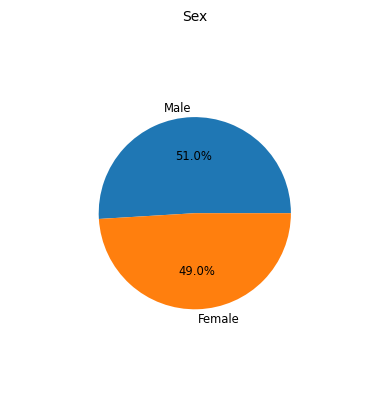

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = gender_panda.values.tolist()
labels = gender_panda.index.tolist()
plt.pie(values, labels=labels,autopct="%1.1f%%", radius=0.65, textprops={'size': 'small'});
plt.title('Sex', fontsize=10, loc='center');

## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cap_df = cleaned_df[cleaned_df['Drug Regimen']=='Capomulin']
ram_df = cleaned_df[cleaned_df['Drug Regimen']=='Ramicane']
inf_df = cleaned_df[cleaned_df['Drug Regimen']=='Infubinol']
cef_df = cleaned_df[cleaned_df['Drug Regimen']=='Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
cap_max = cap_df.groupby('Mouse ID').max()['Timepoint']
ram_max = ram_df.groupby('Mouse ID').max()['Timepoint']
inf_max = inf_df.groupby('Mouse ID').max()['Timepoint']
cef_max = cef_df.groupby('Mouse ID').max()['Timepoint']
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


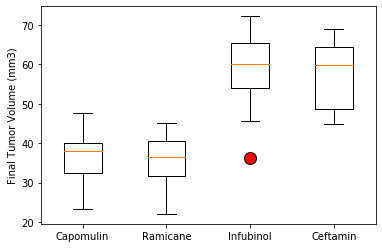

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

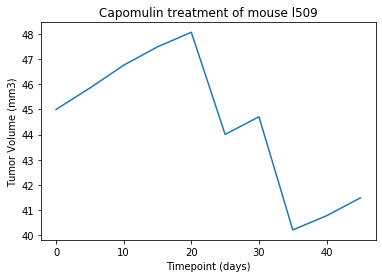

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



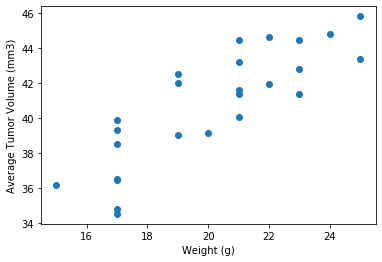

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


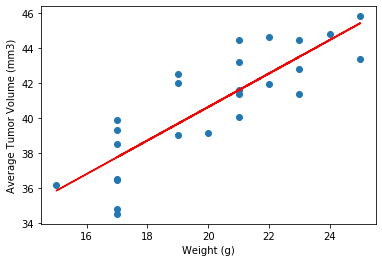

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

